## 데이터 불러오기

In [3]:
import pandas as pd 

df_train = pd.read_csv('train_data.csv')
df_valid = pd.read_csv('valid_data.csv')
df_test = pd.read_csv('test_data.csv')

In [4]:
# x_train, y_train 설정
x_train = df_train.iloc[:, [3, 4] + list(range(6, df_train.shape[1]))]
y_train = df_train.iloc[:, 5]

# x_valid, y_valid 설정
x_valid = df_valid.iloc[:, [3, 4] + list(range(6, df_valid.shape[1]))]
y_valid = df_valid.iloc[:, 5]

# x_test, y_test 설정
x_test = df_test.iloc[:, [3, 4] + list(range(6, df_test.shape[1]))]
y_test = df_test.iloc[:, 5]

In [5]:
print(x_train.shape)
print(y_train.shape)

print(x_valid.shape)
print(y_valid.shape)

print(x_test.shape)
print(y_test.shape)

(50051, 535)
(50051,)
(12513, 535)
(12513,)
(7820, 535)
(7820,)


## 기본 작업

In [6]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

In [7]:
## 레이블 인코딩 작업

In [8]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels with value between 0 and n_classes-1
# XGBClassifier를 사용하기 위해 대상 레이블을 정수로 인코딩해야 합니다.
# 현재 대상 레이블은 범주형 문자열이므로, LabelEncoder를 사용하여 숫자로 변환해야 합니다.

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_valid = label_encoder.transform(y_valid)

# got ['in' 'noise' 'normal' 'other' 'out']---> 클래스를 정수로 인코딩: [0 1 2 3 4]

In [9]:
#pip install xgboost

In [10]:
# XGBoost 모델 설정(default)

params = {}

In [11]:
## DMatrix 생성

In [12]:
dtrain = xgb.DMatrix(data=x_train, label=y_train)
dvalid = xgb.DMatrix(data=x_valid, label=y_valid)

In [13]:
num_rounds = 100
evals = [(dtrain, 'train'), (dvalid, 'valid')]  # 평가용 데이터 세트
model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, evals=evals, verbose_eval=True)

[0]	train-rmse:1.41388	valid-rmse:1.43010
[1]	train-rmse:1.37727	valid-rmse:1.39657
[2]	train-rmse:1.35785	valid-rmse:1.38081
[3]	train-rmse:1.33571	valid-rmse:1.36074
[4]	train-rmse:1.31064	valid-rmse:1.33814
[5]	train-rmse:1.29268	valid-rmse:1.32275
[6]	train-rmse:1.28123	valid-rmse:1.31064
[7]	train-rmse:1.27091	valid-rmse:1.30233
[8]	train-rmse:1.26056	valid-rmse:1.29434
[9]	train-rmse:1.24840	valid-rmse:1.28491
[10]	train-rmse:1.23804	valid-rmse:1.27728
[11]	train-rmse:1.22921	valid-rmse:1.27070
[12]	train-rmse:1.22103	valid-rmse:1.26442
[13]	train-rmse:1.21652	valid-rmse:1.26026
[14]	train-rmse:1.19672	valid-rmse:1.24665
[15]	train-rmse:1.18598	valid-rmse:1.23837
[16]	train-rmse:1.17151	valid-rmse:1.22557
[17]	train-rmse:1.16866	valid-rmse:1.22288
[18]	train-rmse:1.15837	valid-rmse:1.21359
[19]	train-rmse:1.15353	valid-rmse:1.21026
[20]	train-rmse:1.14719	valid-rmse:1.20563
[21]	train-rmse:1.14262	valid-rmse:1.20184
[22]	train-rmse:1.13281	valid-rmse:1.19568
[23]	train-rmse:1.121

## 모델 평가

In [14]:
## 모델 예측(수정후)

In [15]:
y_pred_train = model.predict(dtrain)
y_pred_valid = model.predict(dvalid)

preds_train = np.asarray([np.argmax(line) for line in y_pred_train]) 
preds_valid = np.asarray([np.argmax(line) for line in y_pred_valid])

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_true, y_pred):
    confusion = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print("Confusion Matrix:")
    print(confusion)
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

# 학습 데이터와 벨리드 데이터 예측
y_pred_train = model.predict(dtrain)
y_pred_valid = model.predict(dvalid)

# 학습 데이터 평가
print("Training Data Evaluation:")
get_clf_eval(y_train, preds_train)

# 벨리드 데이터 평가
print("\nValidation Data Evaluation:")
get_clf_eval(y_valid, preds_valid)

Training Data Evaluation:
Confusion Matrix:
[[10557     0     0     0     0]
 [ 4055     0     0     0     0]
 [15824     0     0     0     0]
 [ 5627     0     0     0     0]
 [13988     0     0     0     0]]
Accuracy: 0.2109, Precision: 0.0445, Recall: 0.2109, F1-score: 0.0735

Validation Data Evaluation:
Confusion Matrix:
[[2716    0    0    0    0]
 [ 974    0    0    0    0]
 [3880    0    0    0    0]
 [1392    0    0    0    0]
 [3551    0    0    0    0]]
Accuracy: 0.2171, Precision: 0.0471, Recall: 0.2171, F1-score: 0.0774


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
#수정 전
#에러메시지: AxisError: axis 1 is out of bounds for array of dimension 1


#from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
#from sklearn.metrics import f1_score, roc_auc_score

#def get_clf_eval(y_true, y_pred):
#    confusion = confusion_matrix(y_true, y_pred)
#    accuracy = accuracy_score(y_true, y_pred)
#    precision = precision_score(y_true, y_pred, average='weighted')
#    recall = recall_score(y_true, y_pred, average='weighted')
#    f1 = f1_score(y_true, y_pred, average='weighted')

#    print("Confusion Matrix:")
#    print(confusion)
#    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

# 학습 데이터와 테스트 데이터 예측
#y_pred_train = model.predict(dtrain)
#y_pred_test = model.predict(dtest)

# 학습 데이터 평가
#print("Training Data Evaluation:")
#get_clf_eval(y_train, np.argmax(y_pred_train, axis=1))

# 테스트 데이터 평가
#print("\nTest Data Evaluation:")
#get_clf_eval(y_test, np.argmax(y_pred_test, axis=1))

## Feature importance 계산

In [18]:
## 전제 Feature importance

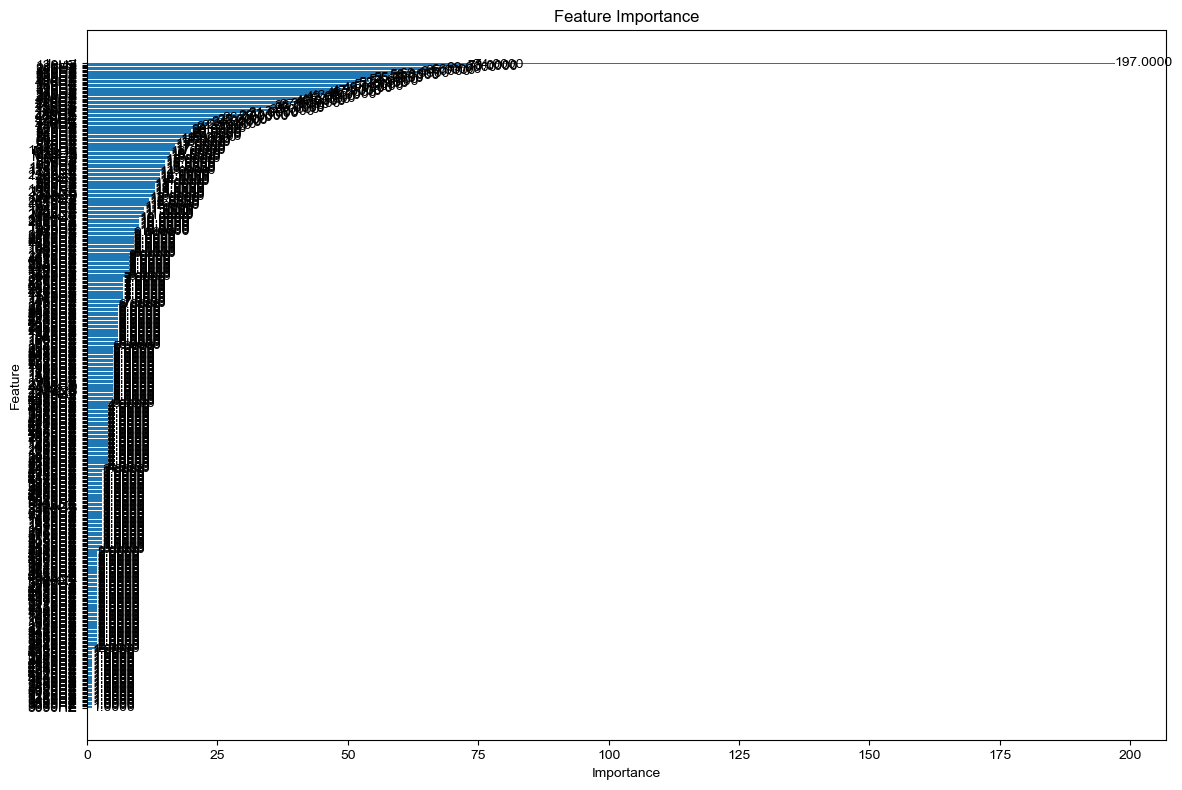

In [19]:
import matplotlib.pyplot as plt

# 폰트를 Arial로 설정
plt.rcParams['font.family'] = 'Arial'

# 피처 중요도 추출
importance = model.get_score(importance_type='weight')
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
feature_names = [x[0] for x in sorted_importance]
importance_values = [x[1] for x in sorted_importance]

# 중요도를 가지고 있는 데이터프레임 생성
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_values
})

# 중요도 순으로 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(12, 8))

bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], align='center')

for bar, importance in zip(bars, feature_importance_df['Importance']):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2, f'{importance:.4f}', 
             va='center', ha='left', fontsize=10, color='black')

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

plt.tight_layout()
plt.show()


In [20]:
## Feature importance 높은 순으로 feature 30개당 그래프 그리기

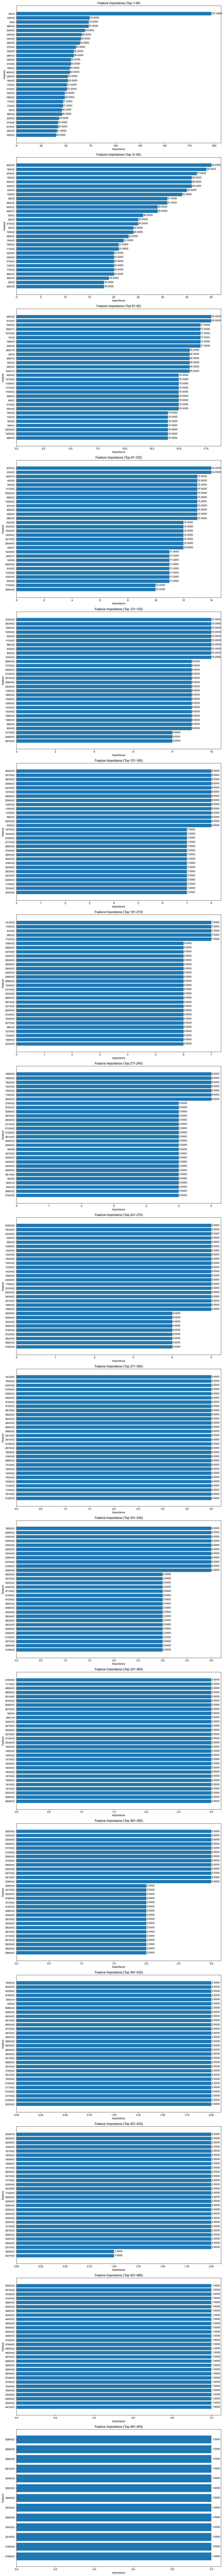

In [21]:
import matplotlib.pyplot as plt

# 피처 중요도 추출
importance = model.get_score(importance_type='weight')
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
feature_names = [x[0] for x in sorted_importance]
importance_values = [x[1] for x in sorted_importance]

# 중요도를 가지고 있는 데이터프레임 생성
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_values
})

# 중요도 순으로 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 피처를 30개씩 나누어 그래프 생성
num_features = len(feature_importance_df)
num_subplots = (num_features // 30) + 1

plt.figure(figsize=(12, 8*num_subplots))

for i in range(num_subplots):
    start_idx = i * 30
    end_idx = min((i + 1) * 30, num_features)
    
    subset_df = feature_importance_df.iloc[start_idx:end_idx]
    subset_df = subset_df.sort_values(by='Importance', ascending=True)  # 중요도가 높은 순으로 정렬
    
    plt.subplot(num_subplots, 1, i+1)
    bars = plt.barh(subset_df['Feature'], subset_df['Importance'], align='center')
    
    for bar, importance in zip(bars, subset_df['Importance']):
        plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2, f'{importance:.4f}', 
                 va='center', ha='left', fontsize=10, color='black')

    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'Feature Importance (Top {start_idx+1}-{end_idx})')

plt.tight_layout()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Skipping feature lrate because it doesn't contain digits.


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

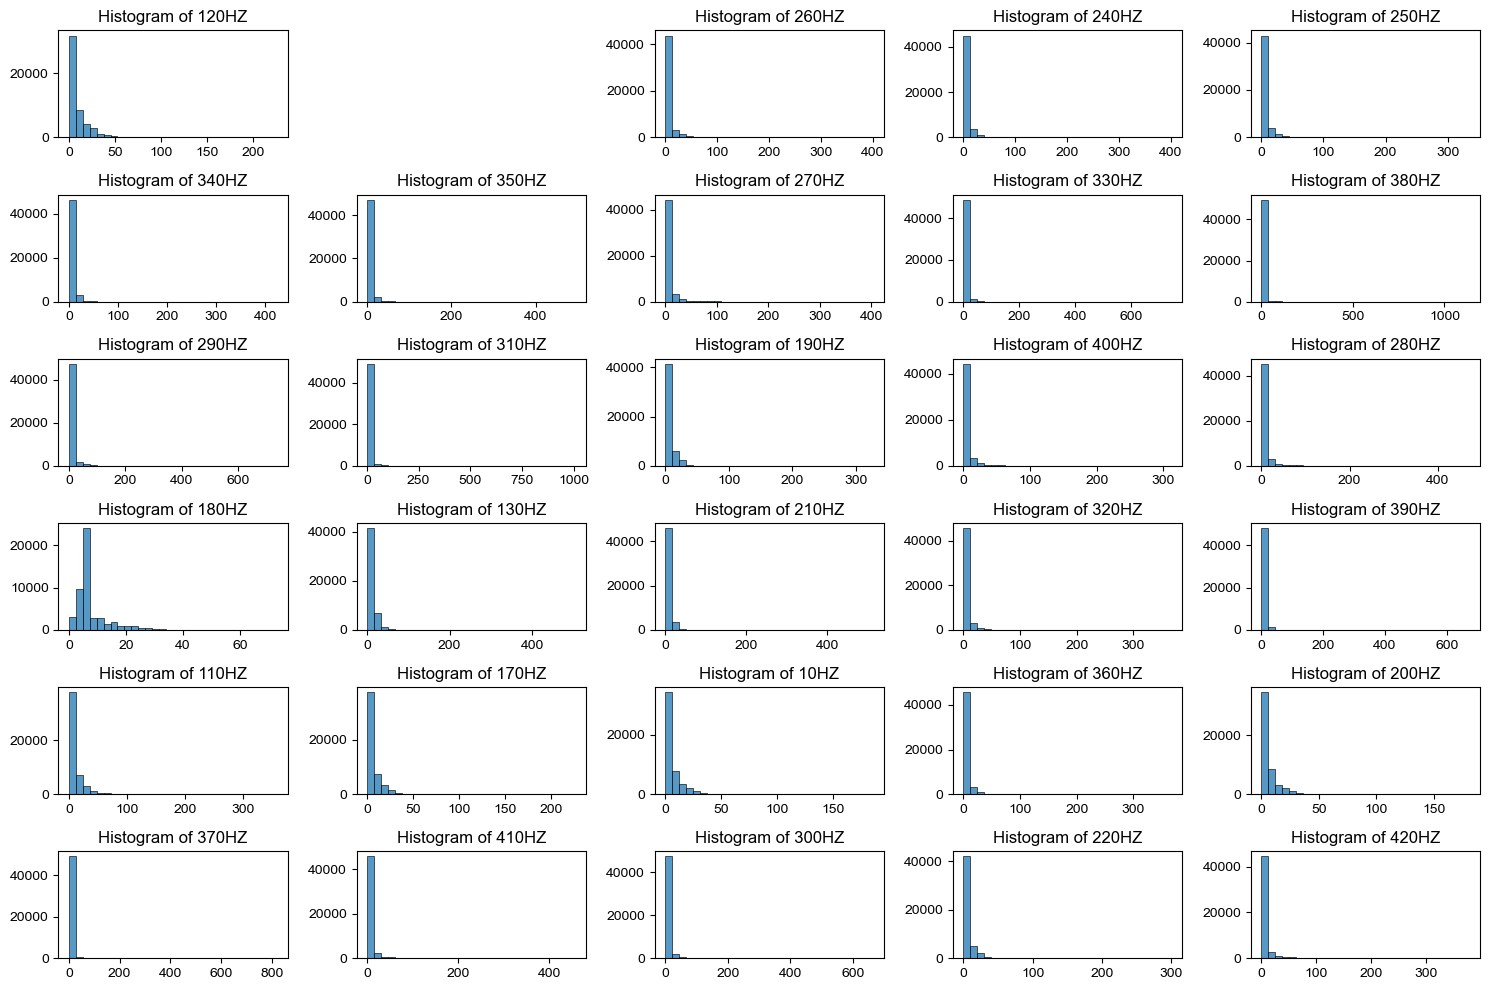

In [22]:
# 'llevel' 변수를 제외하고 상위 30개 피처 선택
top_30_features = feature_importance_df[~feature_importance_df['Feature'].str.contains('llevel')].head(30)['Feature'].values

# 히스토그램 그리기
plt.figure(figsize=(15, 10))

for i, feature in enumerate(top_30_features):
    # 피처 이름에서 숫자 부분 추출
    # 숫자가 없는 경우를 대비하여 예외 처리를 추가합니다.
    try:
        feature_index = int(''.join(filter(str.isdigit, feature)))
    except ValueError:
        print(f"Skipping feature {feature} because it doesn't contain digits.")
        continue
    
    plt.subplot(6, 5, i + 1)
    sns.histplot(x_train.iloc[:, feature_index], kde=False, bins=30)
    plt.title(f'Histogram of {feature}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


## 모델 재학습

In [23]:
## 상위 53개 변수들
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score

# XGBoost 모델 재학습을 위한 상위 변수 선택
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(53)['Feature'].values

print("중요도가 높은 53개 변수들:",top_features)

중요도가 높은 53개 변수들: ['llevel' '120HZ' 'lrate' '260HZ' '240HZ' '250HZ' '340HZ' '350HZ' '270HZ'
 '330HZ' '380HZ' '290HZ' '310HZ' '190HZ' '400HZ' '180HZ' '280HZ' '130HZ'
 '210HZ' '320HZ' '390HZ' '110HZ' '170HZ' '10HZ' '360HZ' '200HZ' '370HZ'
 '410HZ' '300HZ' '220HZ' '420HZ' '160HZ' '430HZ' '150HZ' '230HZ' '440HZ'
 '140HZ' '100HZ' '90HZ' '480HZ' '450HZ' '460HZ' '20HZ' '60HZ' '470HZ'
 '50HZ' '720HZ' '490HZ' '780HZ' '710HZ' '760HZ' '520HZ' '540HZ']


In [24]:
# 상위 변수에 해당하는 데이터만 선택하여 새로운 DMatrix 생성
dtrain_top = xgb.DMatrix(data=x_train[top_features], label=y_train)
dvalid_top = xgb.DMatrix(data=x_valid[top_features], label=y_valid)

# XGBoost 모델 재학습
params = {}

model_top = xgb.train(params, dtrain_top, num_boost_round=100, evals=[(dtrain_top, 'train'), (dvalid_top, 'valid')], early_stopping_rounds=10, verbose_eval=10)

# 재학습된 모델에서 예측 수행
y_pred_train_top = model_top.predict(dtrain_top)
y_pred_valid_top = model_top.predict(dvalid_top)

# 예측값을 클래스로 변환
preds_train_top = np.asarray([np.argmax(line) for line in y_pred_train_top])
preds_valid_top = np.asarray([np.argmax(line) for line in y_pred_valid_top])

# 평가 함수 정의
def get_clf_eval(y_true, y_pred):
    confusion = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print("Confusion Matrix:")
    print(confusion)
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

# 학습 데이터와 검증 데이터에 대해 평가
print("훈련 데이터 평가:")
get_clf_eval(y_train, preds_train_top)

print("\n검증 데이터 평가:")
get_clf_eval(y_valid, preds_valid_top)


[0]	train-rmse:1.41694	valid-rmse:1.43531
[10]	train-rmse:1.23787	valid-rmse:1.27505
[20]	train-rmse:1.13246	valid-rmse:1.19134
[30]	train-rmse:1.04989	valid-rmse:1.12910
[40]	train-rmse:0.98227	valid-rmse:1.07850
[50]	train-rmse:0.92742	valid-rmse:1.04029
[60]	train-rmse:0.88616	valid-rmse:1.01101
[70]	train-rmse:0.83663	valid-rmse:0.98071
[80]	train-rmse:0.79191	valid-rmse:0.95189
[90]	train-rmse:0.76076	valid-rmse:0.93360
[99]	train-rmse:0.73166	valid-rmse:0.91670
훈련 데이터 평가:
Confusion Matrix:
[[10557     0     0     0     0]
 [ 4055     0     0     0     0]
 [15824     0     0     0     0]
 [ 5627     0     0     0     0]
 [13988     0     0     0     0]]
Accuracy: 0.2109, Precision: 0.0445, Recall: 0.2109, F1-score: 0.0735

검증 데이터 평가:
Confusion Matrix:
[[2716    0    0    0    0]
 [ 974    0    0    0    0]
 [3880    0    0    0    0]
 [1392    0    0    0    0]
 [3551    0    0    0    0]]
Accuracy: 0.2171, Precision: 0.0471, Recall: 0.2171, F1-score: 0.0774


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


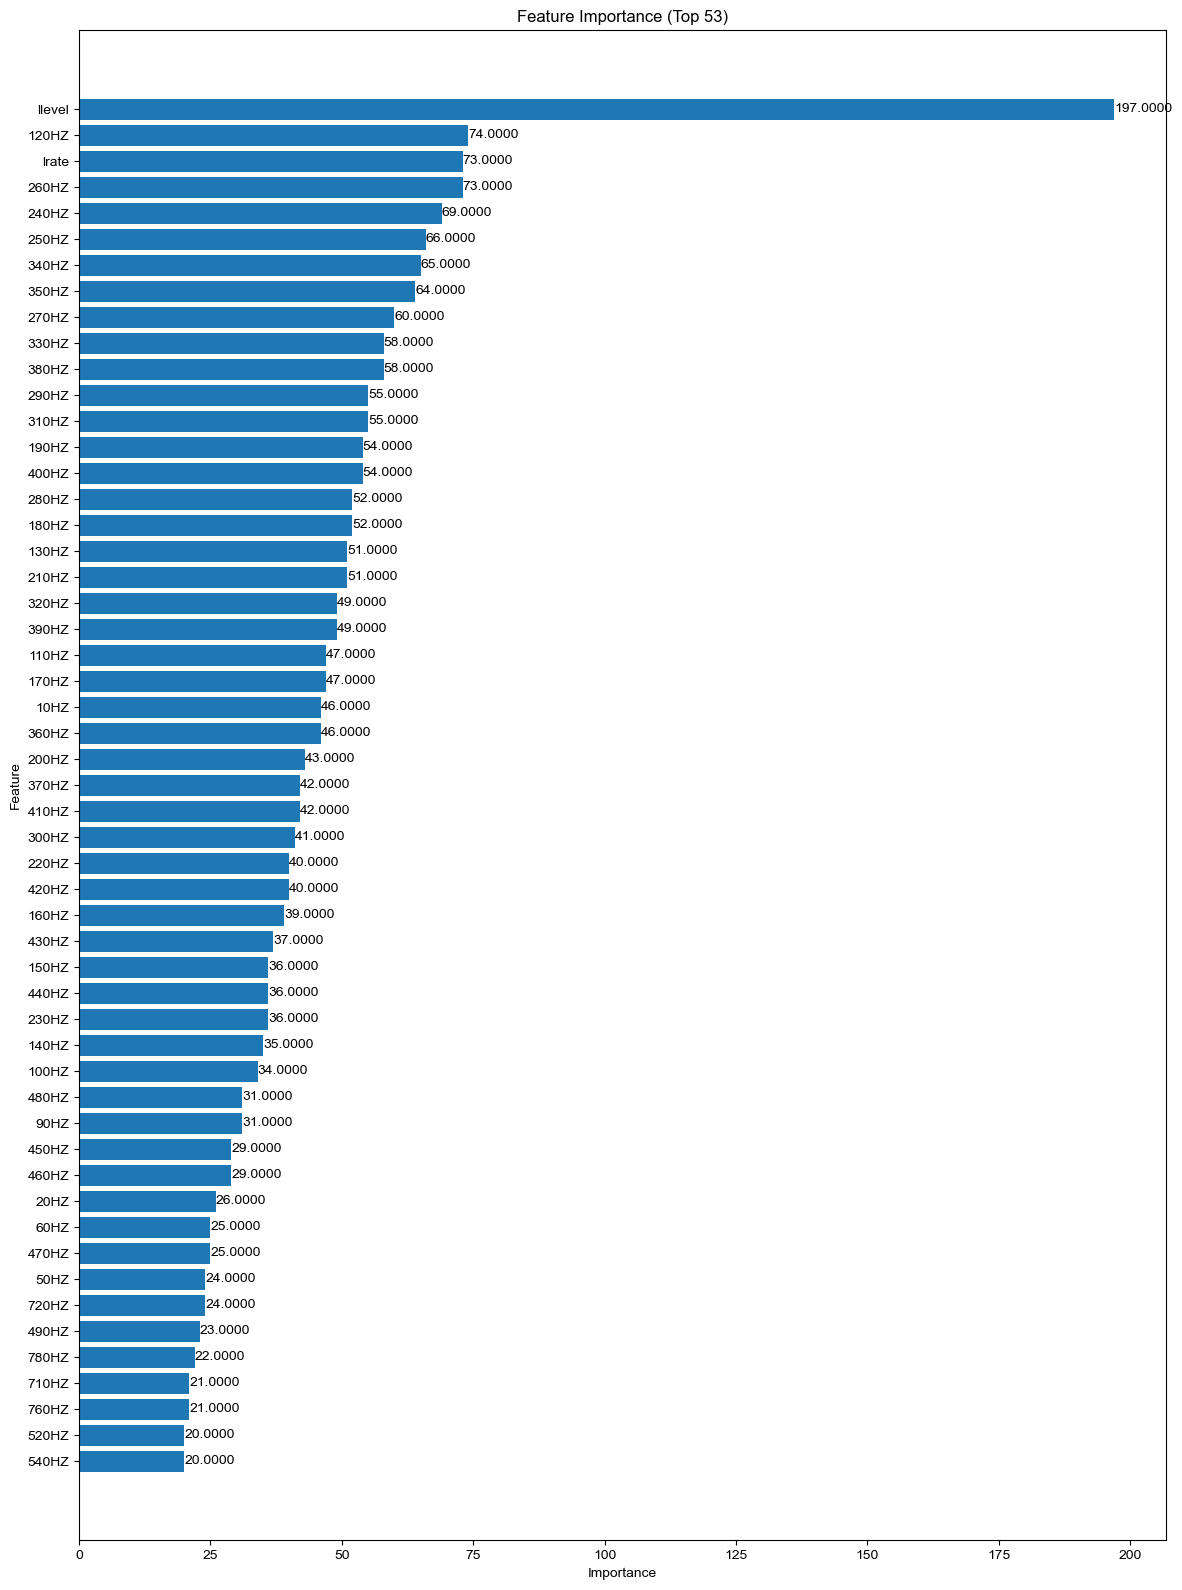

In [25]:
# 중요도 상위 53개 피처 히스토그램
plt.figure(figsize=(12, 16))  # 전체 그림의 사이즈 설정
subset_df = feature_importance_df.head(53)
subset_df = subset_df.sort_values(by='Importance', ascending=True)  # 중요도가 높은 순으로 정렬

bars = plt.barh(subset_df['Feature'], subset_df['Importance'], align='center')

for bar, importance in zip(bars, subset_df['Importance']):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2, f'{importance:.4f}', 
             va='center', ha='left', fontsize=10, color='black')

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Top 53)')
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

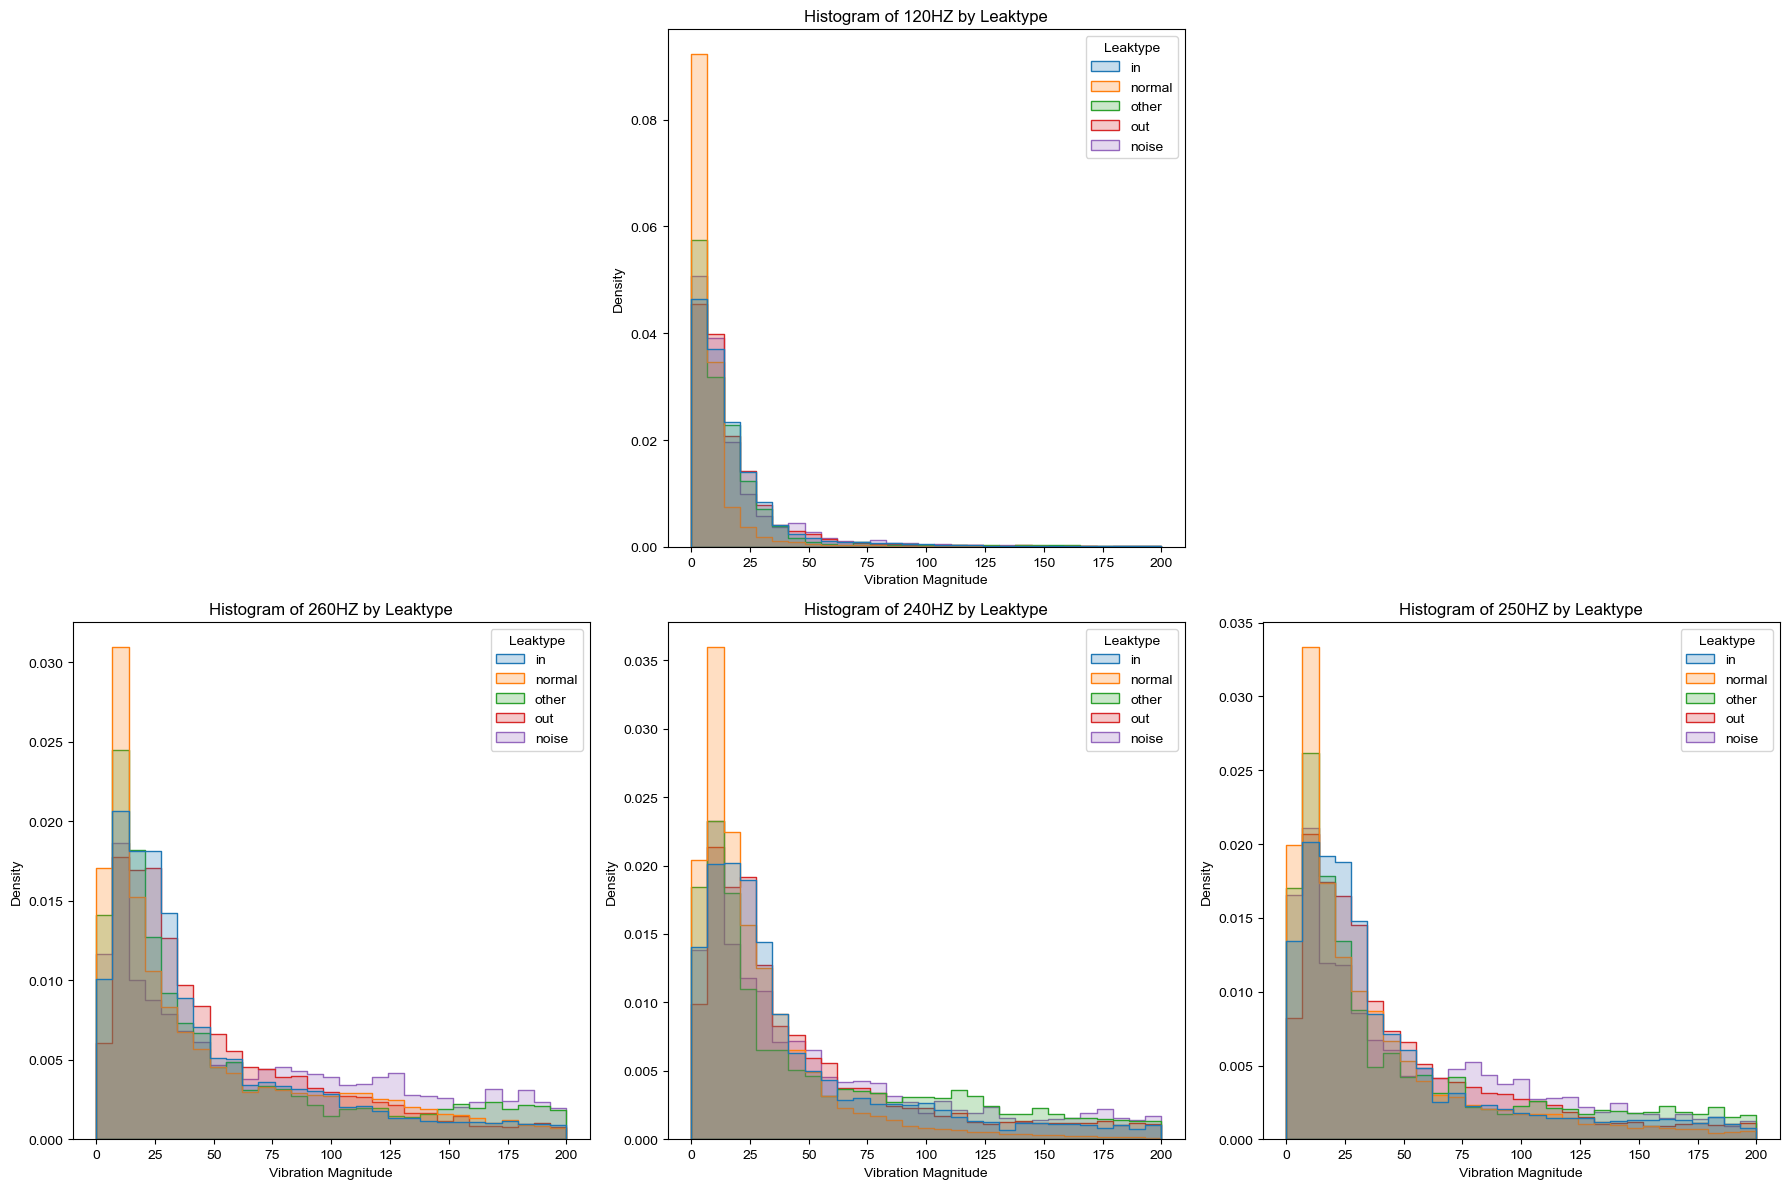

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

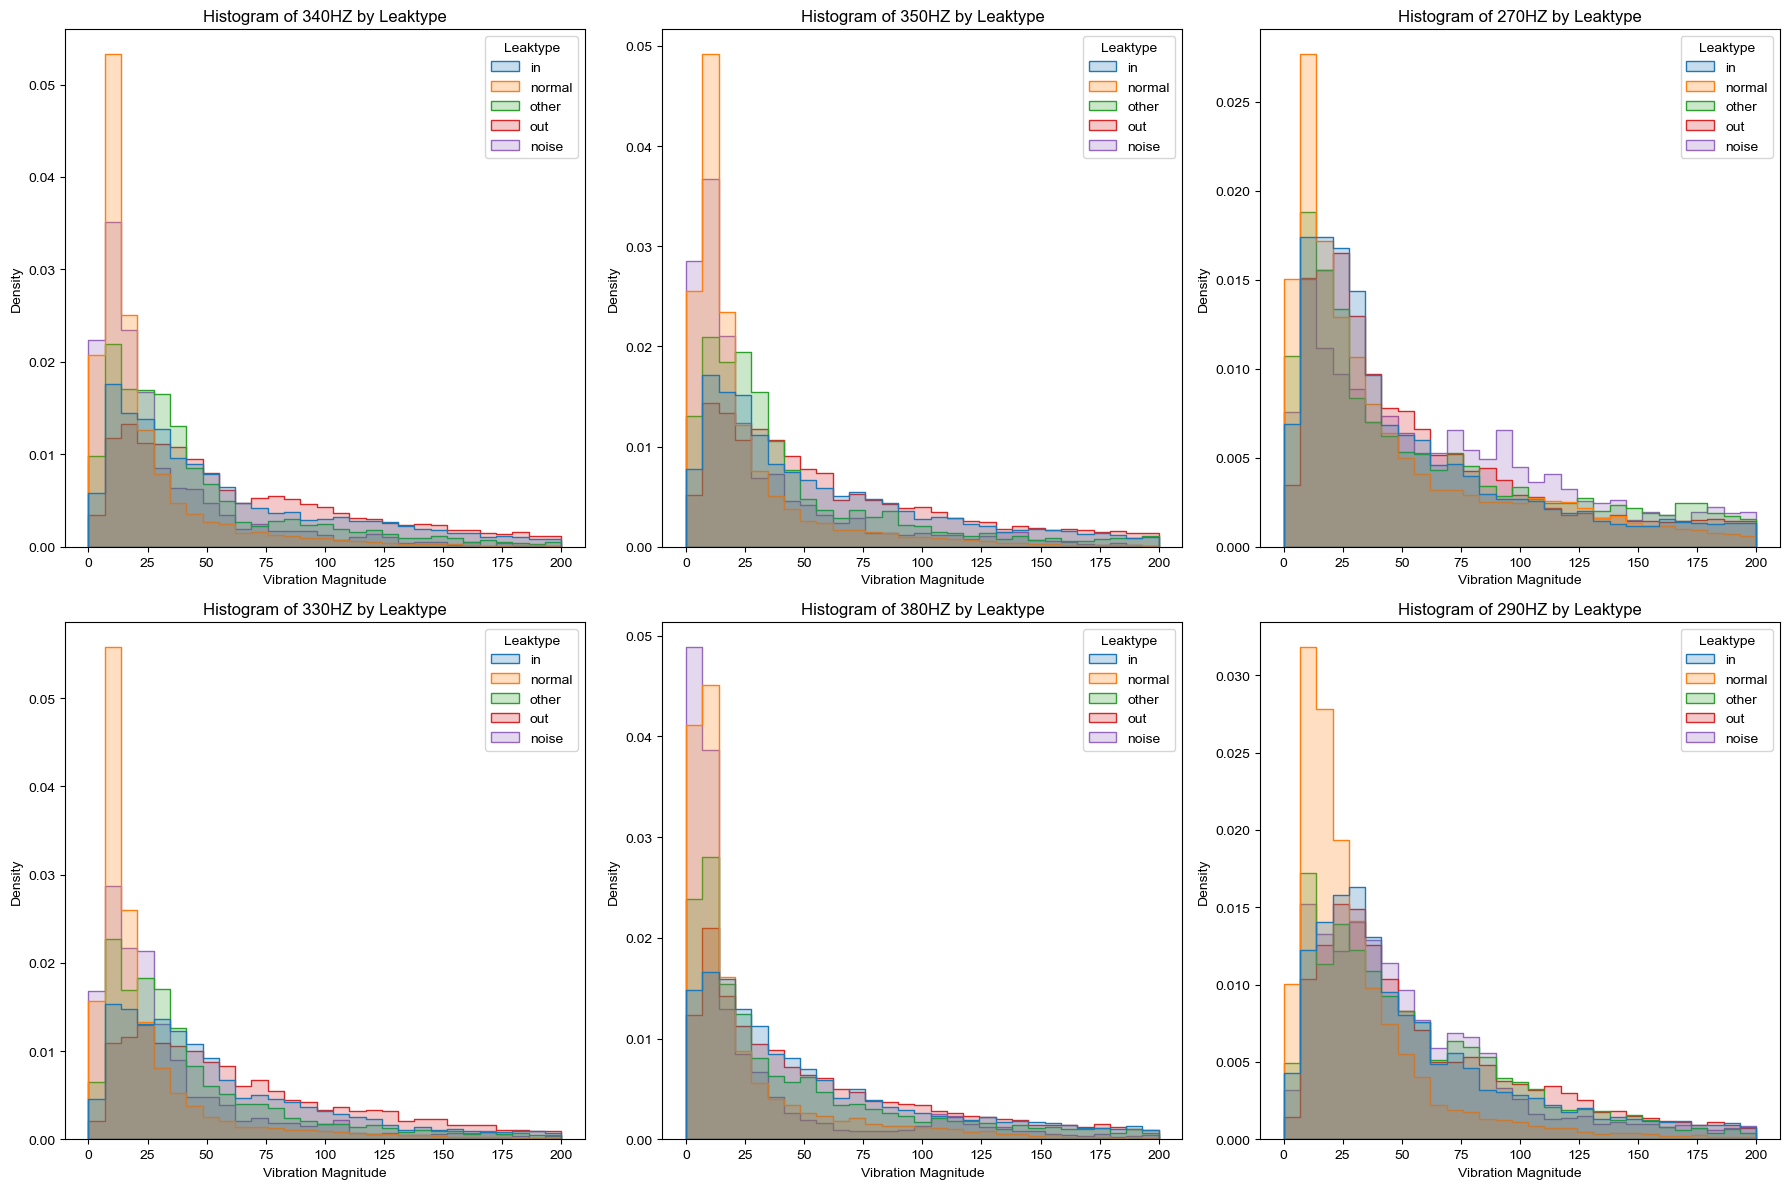

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

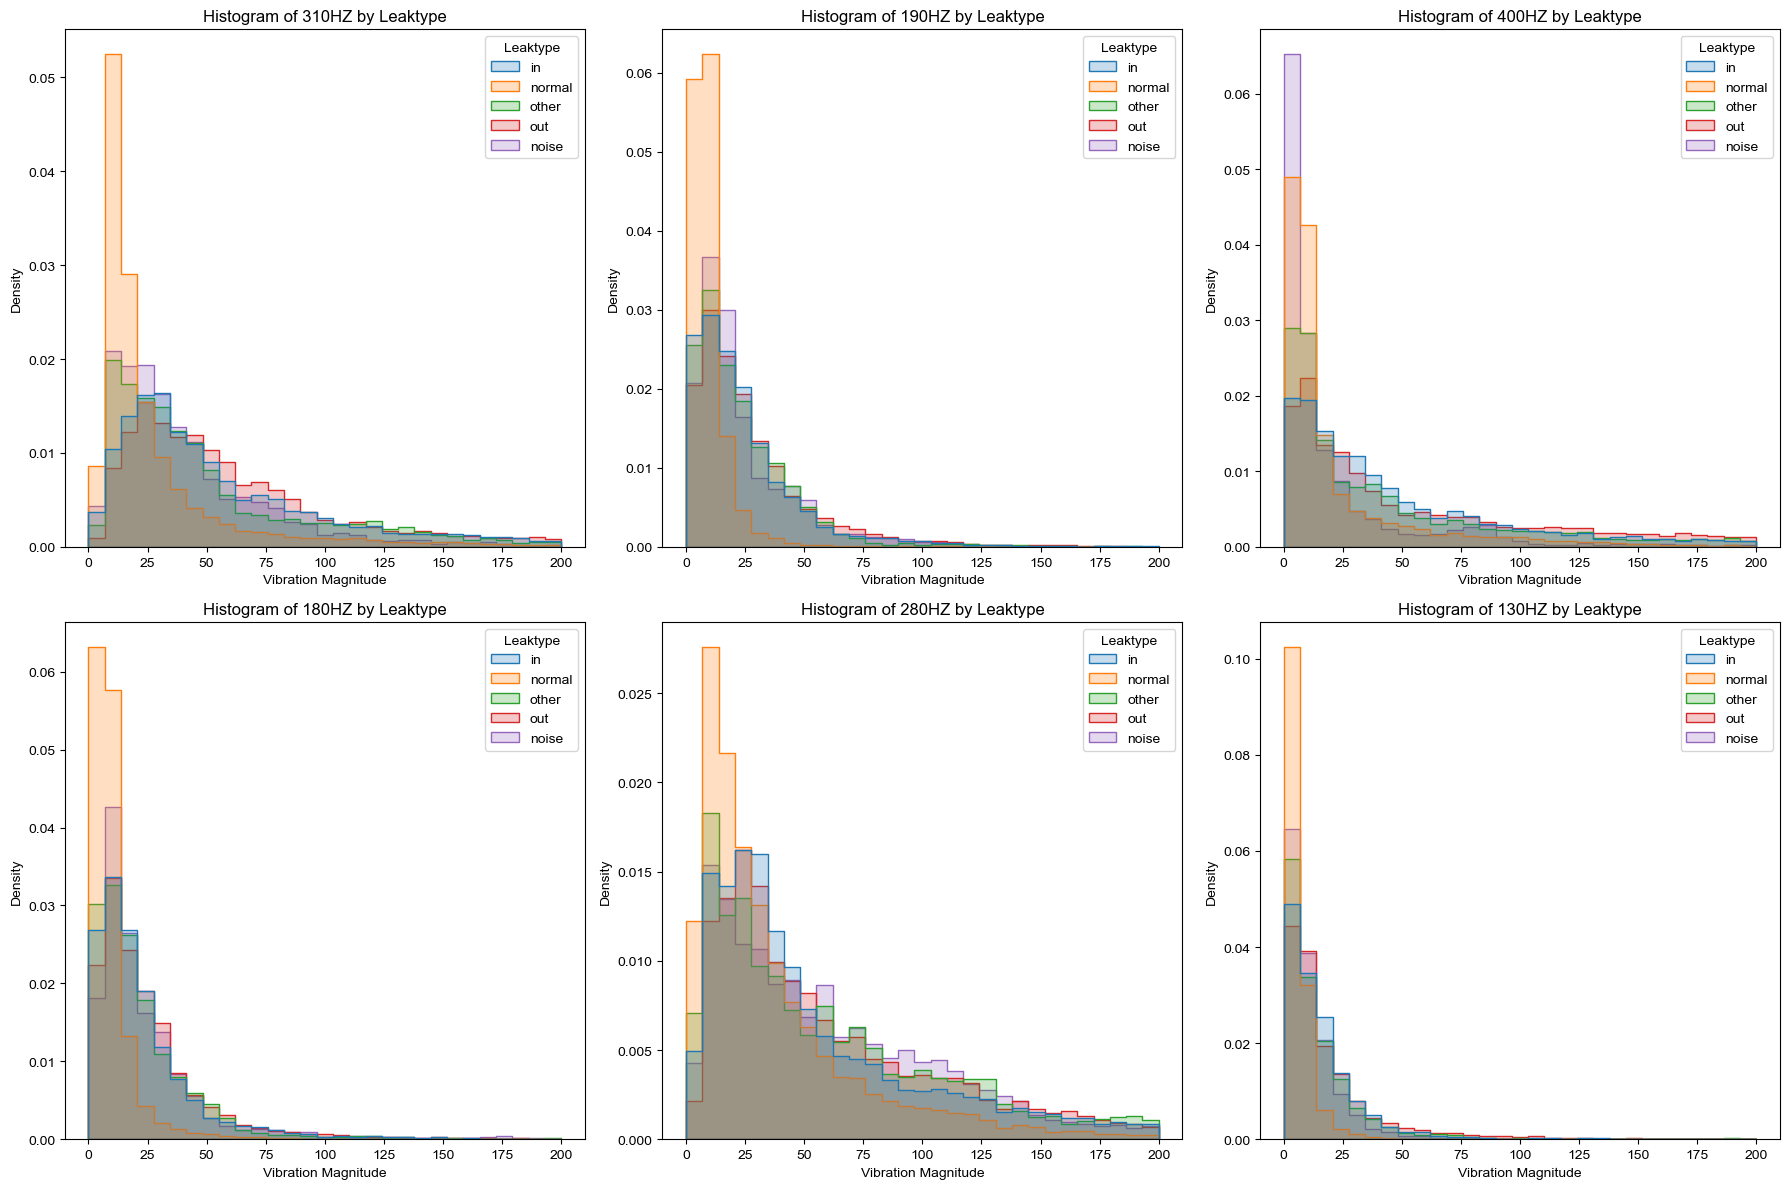

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

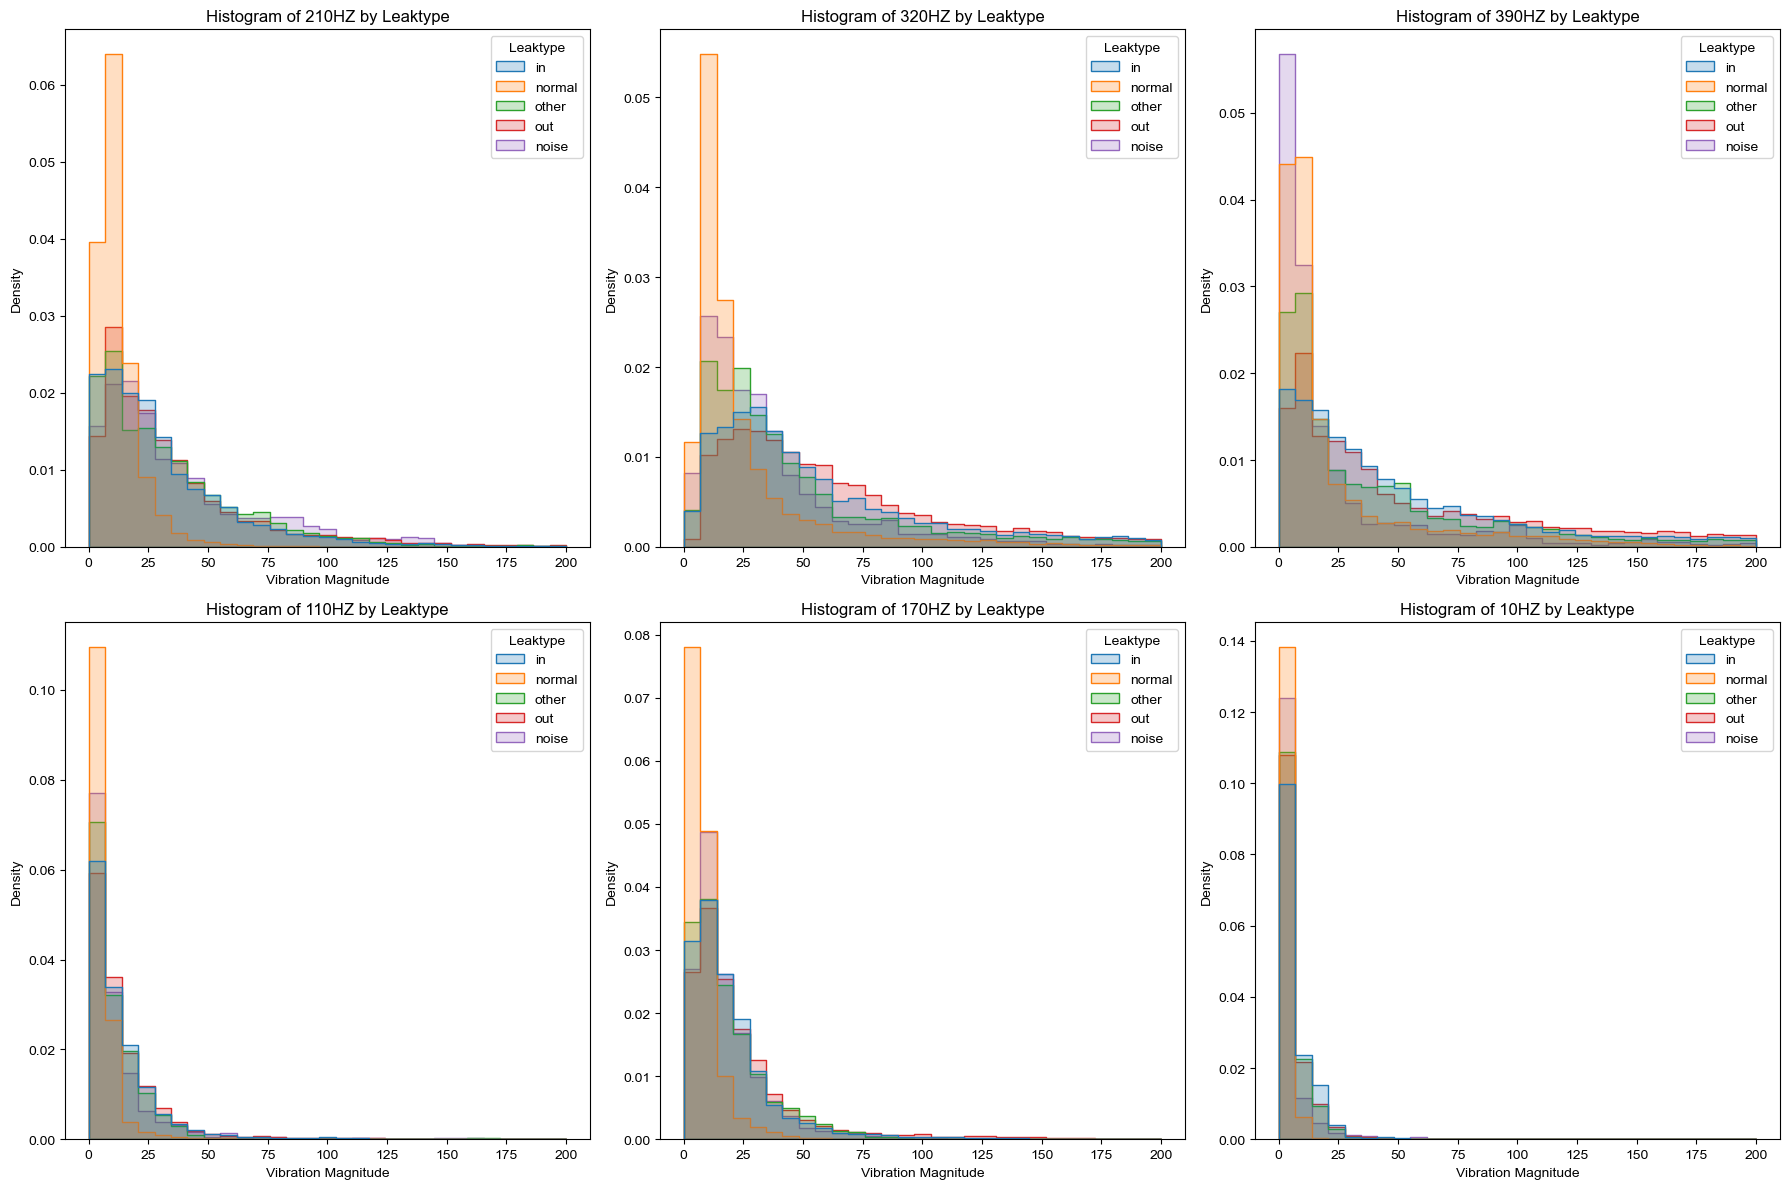

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

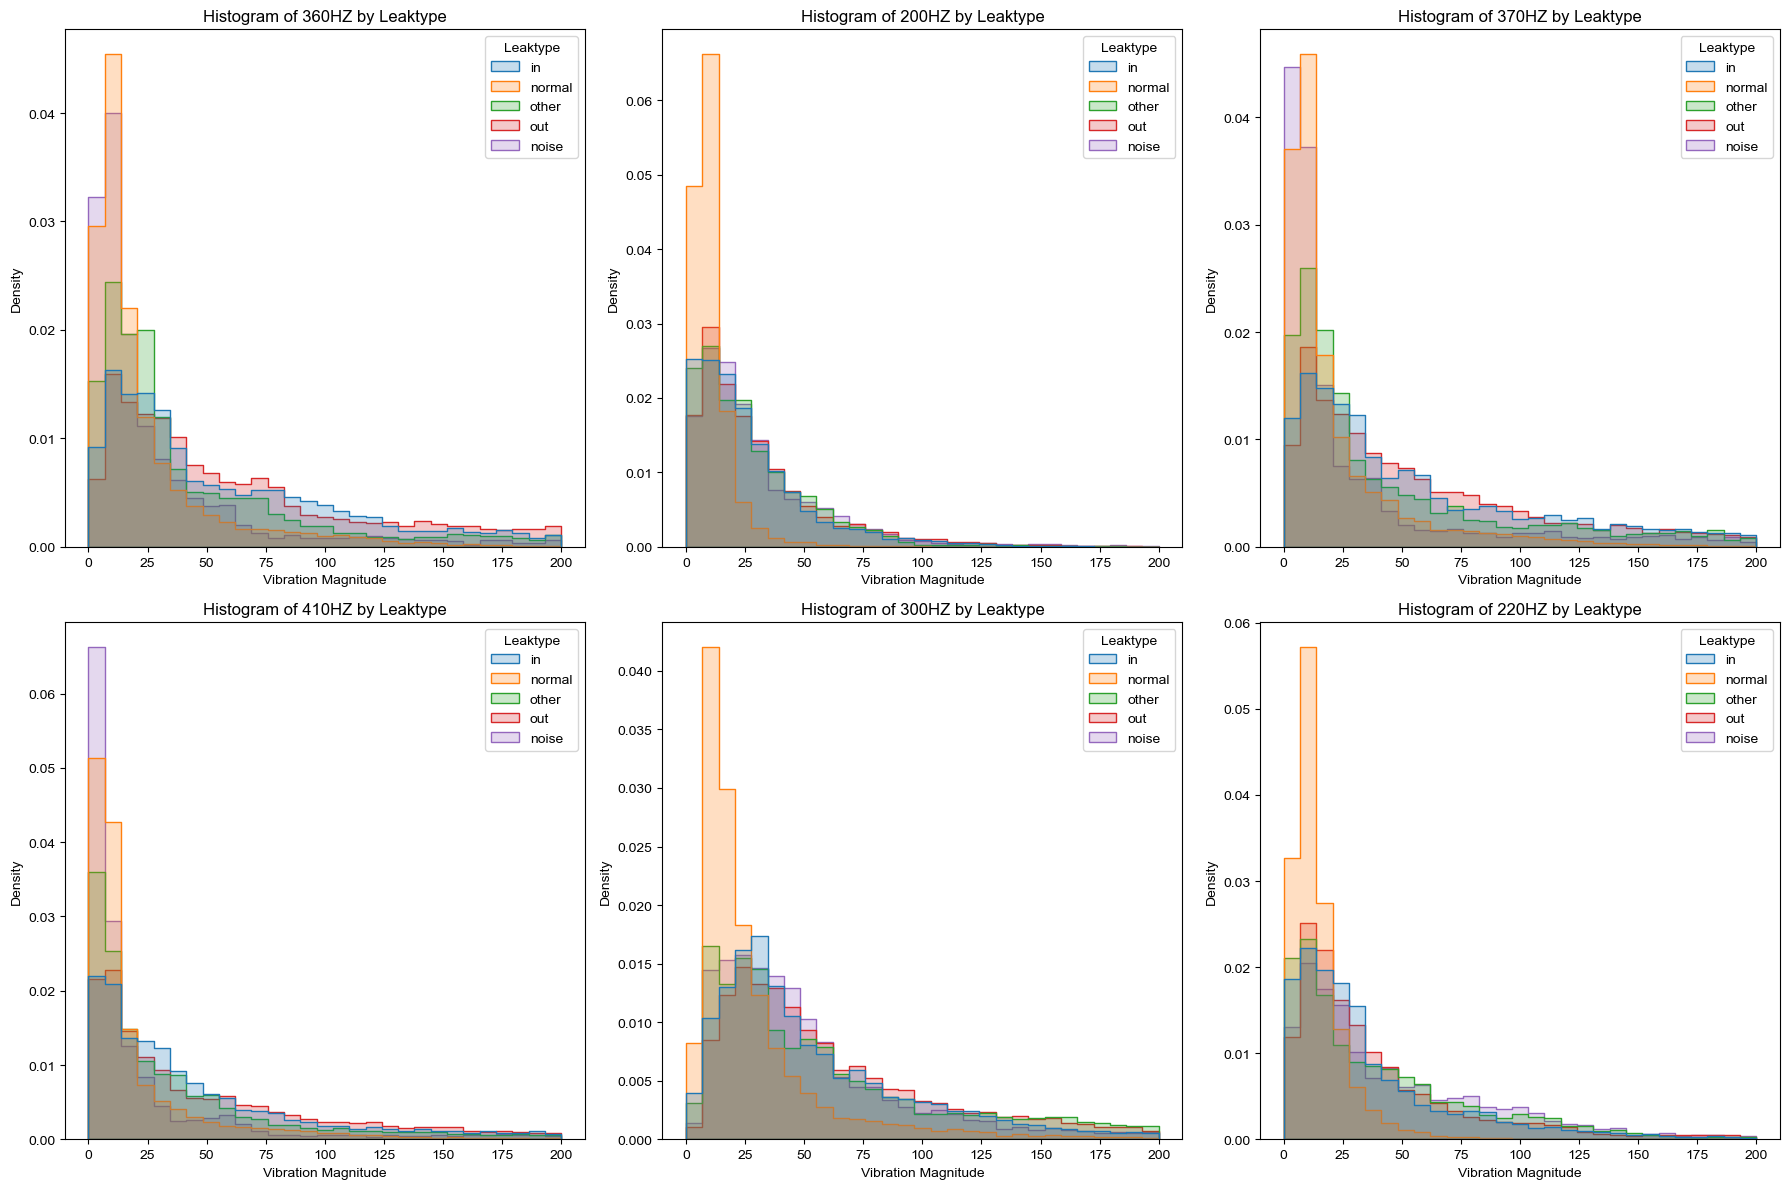

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

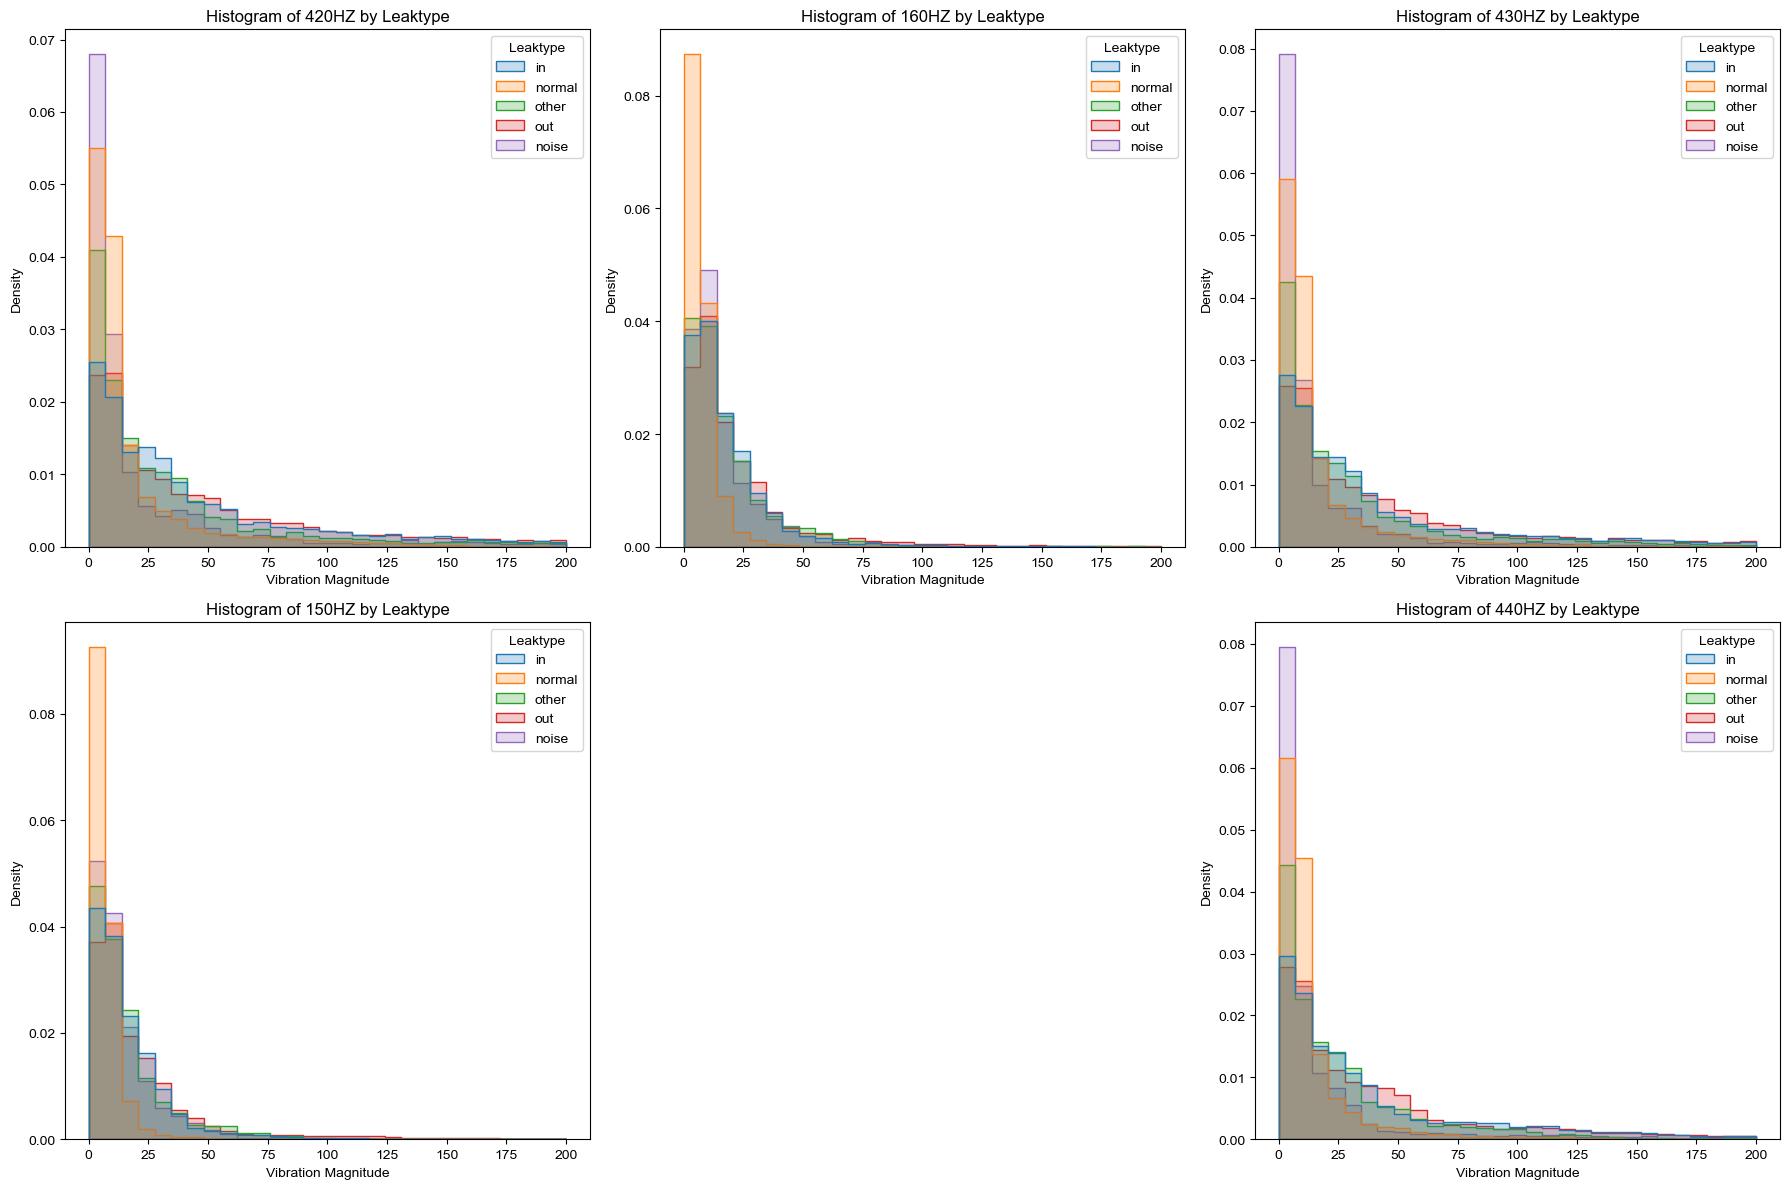

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 피처 중요도 추출
importance = model.get_score(importance_type='weight')
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
feature_names = [x[0] for x in sorted_importance]
importance_values = [x[1] for x in sorted_importance]

# 중요도를 가지고 있는 데이터프레임 생성
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_values
})

# 중요도 순으로 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 상위 53개 피처 선택
top_53_features = feature_importance_df.head(53)

# 'llevel'과 'lrate' 제외
filtered_top_53_features = top_53_features[~top_53_features['Feature'].isin(['llevel', 'lrate'])]

# 히스토그램 그리기
plt.figure(figsize=(18, 12))  # 전체 그림의 사이즈 설정
for i, row in filtered_top_53_features.iterrows():
    feature = row['Feature']
    
    # subplot 위치 계산 (한 줄에 3개씩 배치)
    plt.subplot(2, 3, i % 6 + 1)  # i % 6 + 1은 1부터 6까지의 값을 순환하게 설정
    
    # 히스토그램 그리기
    histplot = sns.histplot(
        data=df_train, 
        x=df_train[feature], 
        hue='leaktype', 
        kde=False, 
        element='step', 
        stat='density', 
        common_norm=False, 
        bins=np.linspace(0, 200, 30)  # bins를 0에서 200 사이로 설정
    )
    histplot.legend_.set_title('Leaktype')  # 범례 제목 설정
    plt.title(f'Histogram of {feature} by Leaktype')
    plt.xlabel('Vibration Magnitude')
    plt.ylabel('Density')

    # 한 줄에 3개씩 그래프 배치를 위한 처리
    if (i + 1) % 6 == 0 or i == len(filtered_top_53_features) - 1:
        plt.tight_layout()
        plt.show()
        if i != len(filtered_top_53_features) - 1:
            plt.figure(figsize=(18, 12))  # 새로운 subplot 준비


In [ ]:
# 중요도 하위 53개 피처 히스토그램
plt.figure(figsize=(12, 16))  # 전체 그림의 사이즈 설정
subset_df = feature_importance_df.tail(53)  # 하위 53개 피처 선택
subset_df = subset_df.sort_values(by='Importance', ascending=True)  # 중요도가 높은 순으로 정렬

bars = plt.barh(subset_df['Feature'], subset_df['Importance'], align='center')

for bar, importance in zip(bars, subset_df['Importance']):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2, f'{importance:.4f}', 
             va='center', ha='left', fontsize=10, color='black')

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Bottom 53)')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 피처 중요도 추출
importance = model.get_score(importance_type='weight')
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
feature_names = [x[0] for x in sorted_importance]
importance_values = [x[1] for x in sorted_importance]

# 중요도를 가지고 있는 데이터프레임 생성
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_values
})

# 중요도 순으로 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 상위 53개 피처 선택
bottom_53_features = feature_importance_df.tail(53)

# 히스토그램 그리기
plt.figure(figsize=(18, 12))  # 전체 그림의 사이즈 설정
for i, row in bottom_53_features.iterrows():
    feature = row['Feature']
    
    # subplot 위치 계산 (한 줄에 3개씩 배치)
    plt.subplot(2, 3, i % 6 + 1)  # i % 6 + 1은 1부터 6까지의 값을 순환하게 설정
    
    # 히스토그램 그리기
    histplot = sns.histplot(
        data=df_train, 
        x=df_train[feature], 
        hue='leaktype', 
        kde=False, 
        element='step', 
        stat='density', 
        common_norm=False, 
        bins=np.linspace(0, 200, 30)  # bins를 0에서 200 사이로 설정
    )
    histplot.legend_.set_title('Leaktype')  # 범례 제목 설정
    plt.title(f'Histogram of {feature} by Leaktype')
    plt.xlabel('Vibration Magnitude')
    plt.ylabel('Density')

    # 한 줄에 3개씩 그래프 배치를 위한 처리
    if (i + 1) % 6 == 0 or i == len(filtered_top_53_features) - 1:
        plt.tight_layout()
        plt.show()
        if i != len(filtered_top_53_features) - 1:
            plt.figure(figsize=(18, 12))  # 새로운 subplot 준비

